In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [17]:


def fringe_to_dist(wavelength, N):
    """Returns distance based on wavlength and number of fringes"""
    return N*wavelength/2


In [2]:
# Determining the wavelength
def disp_to_wavelength(N, delx):
    """Returns wavelength from displacement and fringe count"""
    return 2*delx/N


In [39]:
# Determining thermal expansion coefficient

# Temperatures when new fringe appears TODO: Check data
tmps_ascending = [29.0,29.1,29.3,29.4,29.5,29.6,29.6,29.8,30.0,30.2,30.3,30.4,30.6,30.8,30.8,30.9,31.0,31.2,31.4,31.5,31.8,32,32.1,32.2,32.3,32.5,32.7,32.8,32.9,33.1,33.2,33.3,33.3,433.4,33.5,33.6,33.9,34,34.1,34.3,34.5,34.6,34.7,34.8,34.9,35.1,35.3,35.4,35.6,35.8,35.9,36.0,36.1,36.3,36.5,36.6,36.7,36.8,36.9,37.0,37.2,37.2,37.3,37.4,37.6]
temps_descending = [27.7,27.6,27.4,27.3,37.2,37.1,37,36.8,36.6,36.4,36.2,36.2,36,35.9,35.9,35.8,35.6,35.4,35.3,35.2,35.0,34.8,34.7,34.6,34.6,34.5,34.2,34.1,34.0,33.9,33.8,33.5,33.4,33.3,33.3,33.1,32.9,32.8,32.7,32.6,32.4,32.2,32.1,32.0,32.0,31.9,31.5]

# List of (start_T, stop_T, nr of fringes)


def dist_temp_var_to_heat_coeff(delL,L_0,delT):
    """Returns temp coefficient with parameter"""
    return delL/L_0/delT

def compute_alpha_from_temp_list_using_rolling(temperature_list, L0, rolling):
    """Computes thermal expansion coeff, from list of temperatures"""
    # Temperature when new fringe appeared in ascending order 
    # Rolling difference first item needs to be treated seperately, (last element not computed)
    temp_diff_1 = np.diff(temperature_list,rolling)
    fringe_count = np.linspace(1,len(temp_diff_1),len(temp_diff_1))
    temp_diff_1_dist = fringe_to_dist(525*1e-6, fringe_count)
    return dist_temp_var_to_heat_coeff(temp_diff_1_dist,1,temp_diff_1)

# TODO Fix L0
L0 = 1
heat_coeff_rolling_params_ascending_sample = [compute_alpha_from_temp_list_using_rolling(temperature_list=tmps_ascending, L0=L0, rolling=i) for i in range(1,10)]
heat_coeff_rolling_params_descending_sample = [compute_alpha_from_temp_list_using_rolling(temperature_list=temps_descending, L0=L0, rolling=i) for i in range(1,10)]


/tmp/ipykernel_55572/2574281322.py:12: RuntimeWarning: divide by zero encountered in divide
  return delL/L_0/delT


In [46]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


In [59]:
tmps_ascending[:-(i+1):]+np.diff(tmps_ascending, i+1)/2,

(array([ 3.245000e+01,  2.385000e+01,  3.420000e+01,  2.595000e+01,
         3.165000e+01,  2.870000e+01,  2.965000e+01,  2.875000e+01,
         3.360000e+01,  2.495000e+01,  3.510000e+01,  2.735000e+01,
         3.100000e+01,  3.385000e+01,  2.520000e+01,  3.610000e+01,
         2.860000e+01,  3.090000e+01,  3.300000e+01,  2.980000e+01,
         3.260000e+01,  3.230000e+01,  3.210000e+01,  3.035000e+01,
         2.358500e+02, -1.771650e+03,  7.236900e+03, -1.677100e+04,
         2.523495e+04, -2.516550e+04,  1.682805e+04, -7.160100e+03,
         1.828700e+03,  2.348000e+02,  3.340000e+01,  3.440000e+01,
         3.255000e+01,  3.465000e+01,  3.475000e+01,  3.300000e+01,
         3.485000e+01,  3.630000e+01,  3.190000e+01,  3.650000e+01,
         3.530000e+01,  3.340000e+01,  3.730000e+01,  3.365000e+01,
         3.635000e+01,  3.650000e+01,  3.450000e+01,  3.705000e+01,
         3.530000e+01,  3.815000e+01,  3.230000e+01,  4.295000e+01]),)

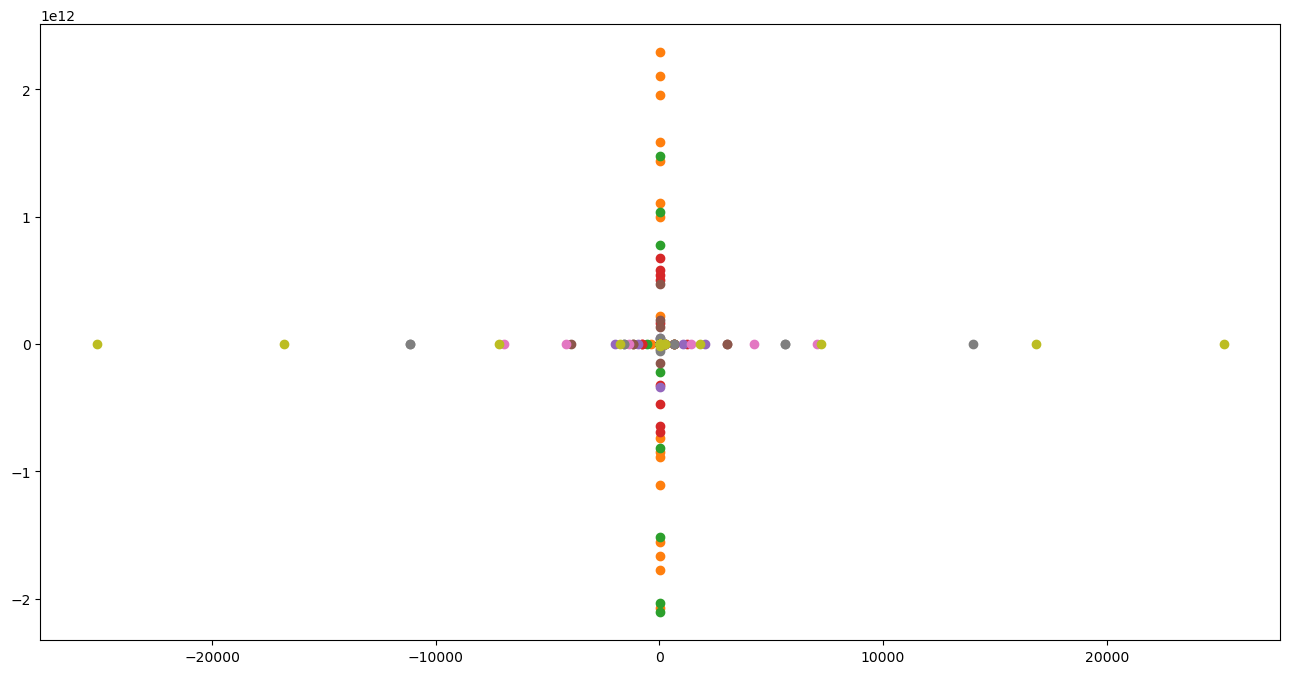

In [58]:
fig = plt.figure(figsize=(16,8))
for i in range(len(heat_coeff_rolling_params_ascending_sample)): 
    plt.scatter(tmps_ascending[:-(i+1):]+np.diff(tmps_ascending, i+1)/2, heat_coeff_rolling_params_ascending_sample[i])

In [37]:
len(tmps_ascending)

65